<a href="https://colab.research.google.com/github/Bikramjeetsingh02/Credit-Risk-Analysis/blob/main/ADT_TechRight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A high-level plotting API for the PyData ecosystem built on HoloViews.
! pip install hvplot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')
from scipy import stats
import missingno as msno
import holoviews.plotting.mpl
from bokeh.io import output_notebook
output_notebook()


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler


In [5]:
import sklearn.metrics

In [6]:
from sklearn.metrics import( accuracy_score, confusion_matrix)
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix,roc_curve,classification_report,roc_auc_score,roc_curve,auc)

import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline

pd.set_option ('display.float','{:0.2f}'.format)
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

In [7]:
path='/content/sample_data/loan.csv'
df = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

> Data Analysis: 
To understand the variables in the Data

In [ ]:
# Displaying Missing Data
import missingno as msno
msno.bar(df)

In [ ]:
msno.matrix(df)

In [ ]:
df['loan_status'].value_counts().hvplot.bar()

:Bars   [index]   (loan_status)

We noticed almost perfect correlation between "loan_amnt" the "installment"

<Axes: >

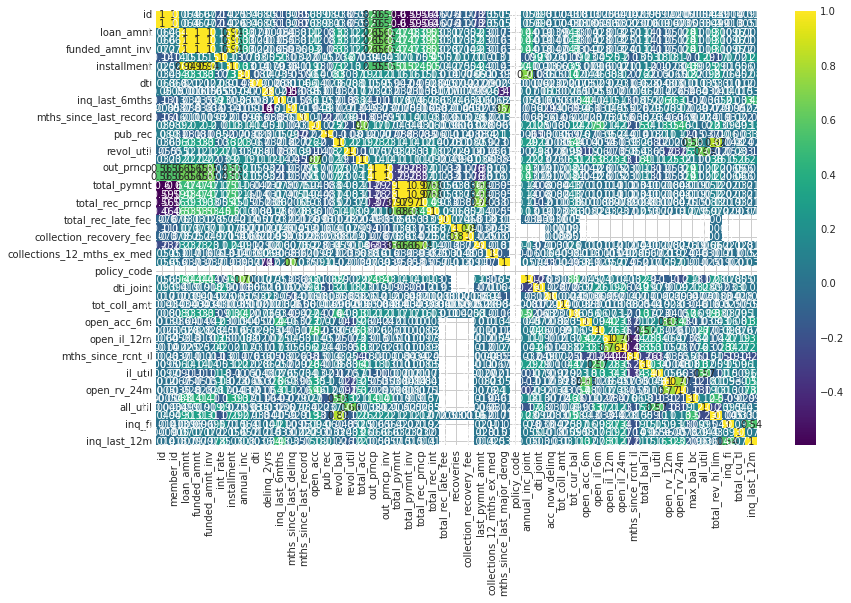

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [62]:
df.hvplot.hist(y='installment', by='loan_status',subplots=False, width=600, height=300, bins=50, alpha=0.4)


:NdOverlay   [loan_status]
   :Histogram   [installment]   (installment_count)

In [ ]:
df.hvplot.hist(y='loan_amnt', by='loan_status',
                 subplots=False, width=600, height=300, bins=30, alpha=0.4)


:NdOverlay   [loan_status]
   :Histogram   [loan_amnt]   (loan_amnt_count)

In [ ]:
df.hvplot.box(y='loan_amnt', subplots=True, by='loan_status', width=600, height=300)

:BoxWhisker   [loan_status]   (loan_amnt)

In [ ]:
df.hvplot.box(y='installment', by='loan_status',width=600, height=300)

:BoxWhisker   [loan_status]   (installment)

In [ ]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,45248.0,14556.293096,8393.421467,900.0,8000.0,12675.0,20000.0,35000.0
Current,601779.0,15241.880242,8497.000503,1000.0,8800.0,14000.0,20000.0,35000.0
Default,1219.0,15193.847416,8315.960324,1000.0,9475.0,13675.0,20000.0,35000.0
Does not meet the credit policy. Status:Charged Off,761.0,9527.233903,6404.598723,500.0,5000.0,7750.0,12000.0,25000.0
Does not meet the credit policy. Status:Fully Paid,1988.0,8853.231891,6163.442950,500.0,4000.0,7200.0,12000.0,25000.0
Fully Paid,207723.0,13346.350910,8057.388288,500.0,7200.0,12000.0,18000.0,35000.0
In Grace Period,6253.0,16005.741244,8683.852017,1000.0,9600.0,15000.0,21000.0,35000.0
Issued,8460.0,15298.587470,8887.907442,1000.0,8000.0,14000.0,21000.0,35000.0
Late (16-30 days),2357.0,15670.661858,8786.578921,1000.0,9000.0,14400.0,20950.0,35000.0


In [ ]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [73]:
df['grade'].value_counts()


B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

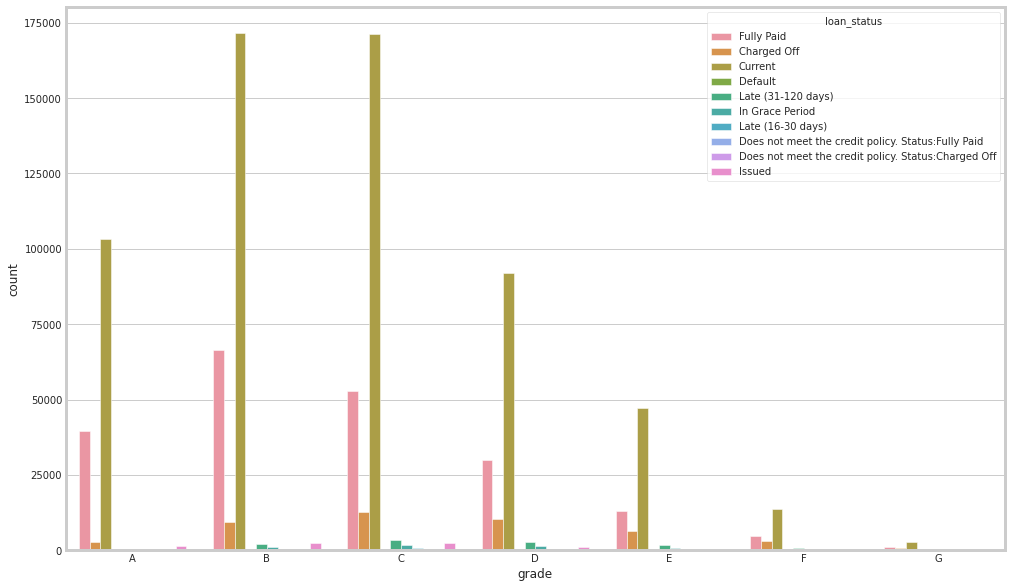

In [91]:
plt.figure(figsize=(15,10))
grade_s=sorted(df.grade.unique().tolist())
sns.countplot(x='grade',data=df,hue='loan_status',order =grade_s)

<Axes: xlabel='sub_grade', ylabel='count'>

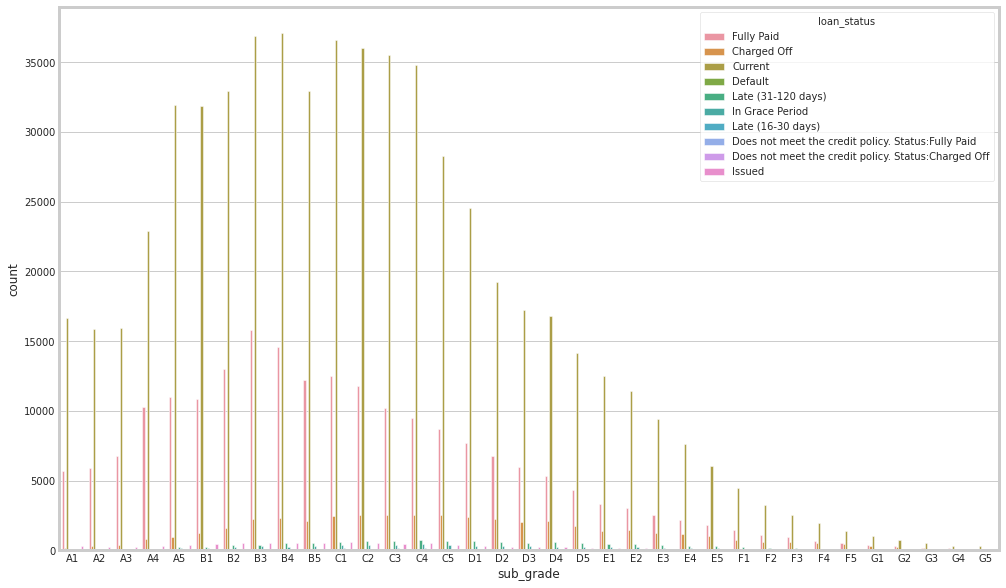

In [92]:
plt.figure(figsize=(15,10))
sub_grade=sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order =sub_grade)

<Axes: xlabel='sub_grade', ylabel='count'>

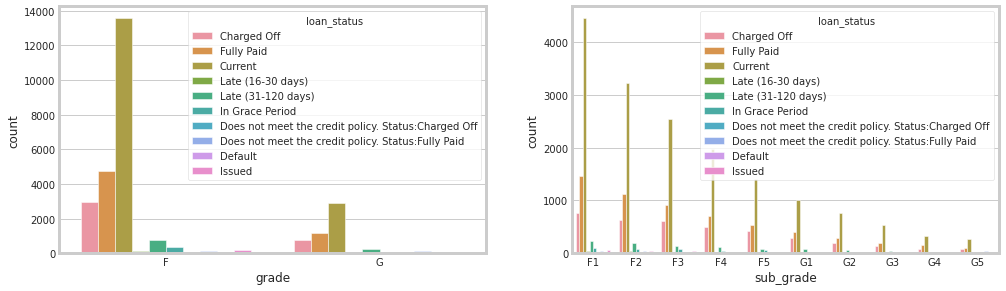

In [90]:
df1 = df[(df.grade == 'F') | (df.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df1.grade.unique().tolist())
sns.countplot(x='grade', data=df1, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df1.sub_grade.unique().tolist())
sns.countplot(x='sub_grade',data=df1,  hue='loan_status', order=sub_grade)


In [93]:
df.home_ownership.value_counts().hvplot.bar()

:Bars   [index]   (home_ownership)

In [ ]:
fully_paid = df.loc[df['loan_status']=='Fully Paid', 'home_ownership'].value_counts().hvplot.bar() 
charged_off = df.loc[df['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()
fully_paid * charged_off

In [99]:
df.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

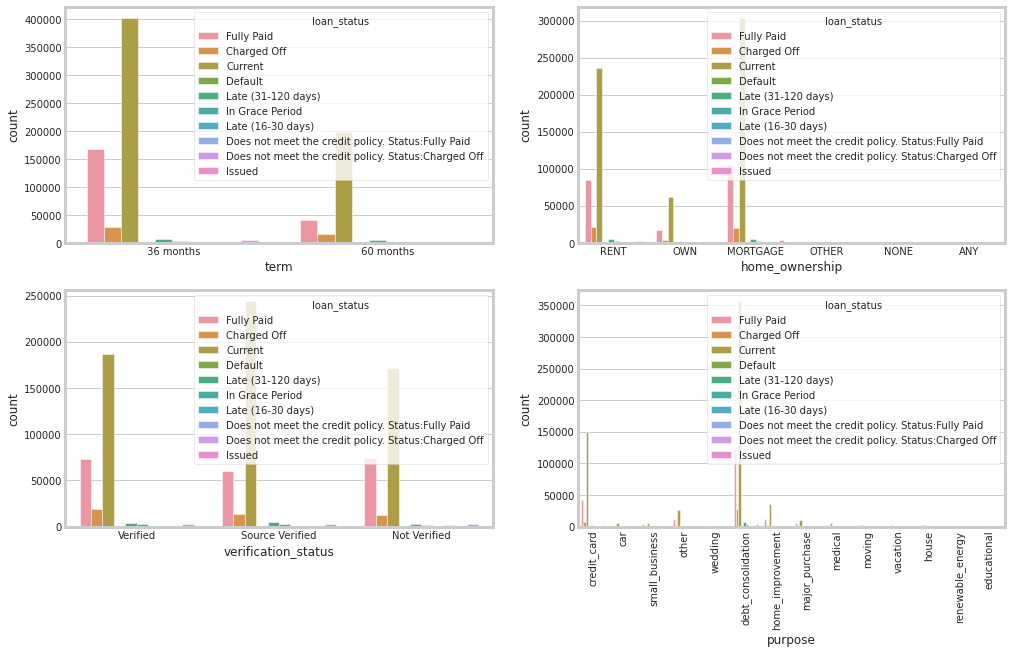

In [101]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x=df['term'],data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90);


In [102]:
df[df.annual_inc >= 1000000].hvplot.hist(y='annual_inc', by='loan_status', bins=35, alpha=0.3)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

In [103]:
df[df.annual_inc >= 1000000].shape

(182, 74)

Observation:-

The Loan with hight Interest rate are more likely to be unpaid.
Only 75 borrower's having an annual income more than 1 Million

In [104]:
df['emp_title'].isnull().sum()

51462

In [106]:
# Converting emp_title to lowercase

df['emp_title']=df['emp_title'].str.lower()
df['emp_title'].head()

0                         NaN
1                       ryder
2                         NaN
3         air resources board
4    university medical group
Name: emp_title, dtype: object

In [107]:
df.emp_title.value_counts()[:40]

teacher                     16619
manager                     14963
owner                        8586
registered nurse             7721
supervisor                   6937
driver                       6215
sales                        6208
rn                           6017
office manager               4687
project manager              4625
general manager              4256
truck driver                 3566
director                     3427
engineer                     3186
president                    3094
sales manager                2713
vice president               2633
police officer               2603
operations manager           2591
store manager                2465
attorney                     2388
accountant                   2353
administrative assistant     2307
nurse                        2160
technician                   2155
account manager              2107
mechanic                     1982
assistant manager            1830
executive assistant          1742
analyst       

In [108]:
def manager(string):
    if type(string) is str:
        return 'manager' if 'manager' in string else string

def president(string):
    if type(string) is str:
        return 'president' if 'president' in string else string
    
def nurse(string):
    if type(string) is str:
        return 'nurse' if 'nurse' in string else string
    
def driver(string):
    if type(string) is str:
        return 'driver' if 'driver' in string else string
    
def assistant(string):
    if type(string) is str:
        return 'assistant' if 'assistant' in string else string

def engineer(string):
    if type(string) is str:
        return 'engineer' if 'engineer' in string else string    

functions = [manager, president, nurse, driver, assistant, engineer]
for func in functions:
    df['emp_title'] = df.emp_title.apply(func)


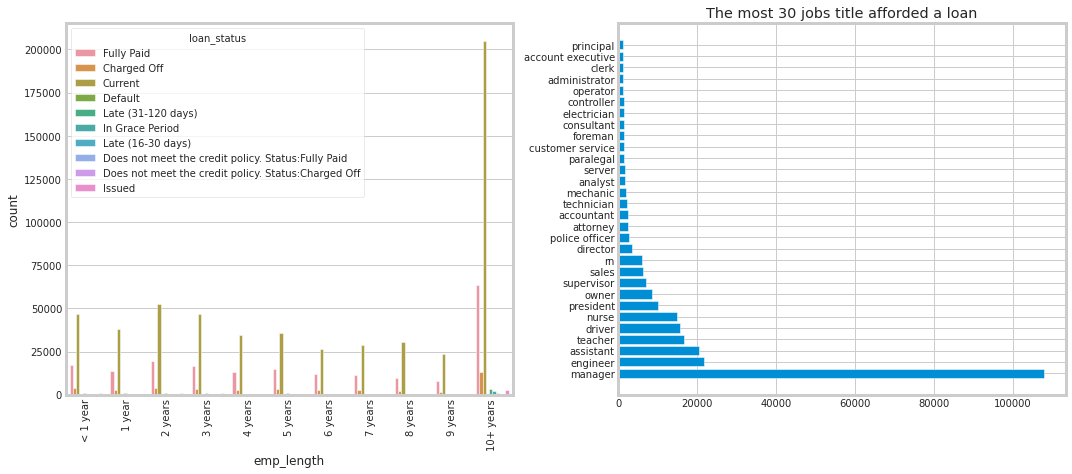

In [109]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

In [111]:
fully_paid = df.loc[df['loan_status']=='Fully Paid', 'issue_d'].value_counts().hvplot.hist(bins=35) 
charged_off = df.loc[df['loan_status']=='Charged Off', 'issue_d'].value_counts().hvplot.hist(bins=35)
fully_paid * charged_off

:Overlay
   .Histogram.I  :Histogram   [issue_d]   (issue_d_count)
   .Histogram.II :Histogram   [issue_d]   (issue_d_count)

In [112]:
fully_paid = df.loc[df['loan_status']=='Fully Paid', 'earliest_cr_line'].value_counts().hvplot.hist(bins=35) 
charged_off = df.loc[df['loan_status']=='Charged Off', 'earliest_cr_line'].value_counts().hvplot.hist(bins=35)
fully_paid * charged_off

:Overlay
   .Histogram.I  :Histogram   [earliest_cr_line]   (earliest_cr_line_count)
   .Histogram.II :Histogram   [earliest_cr_line]   (earliest_cr_line_count)

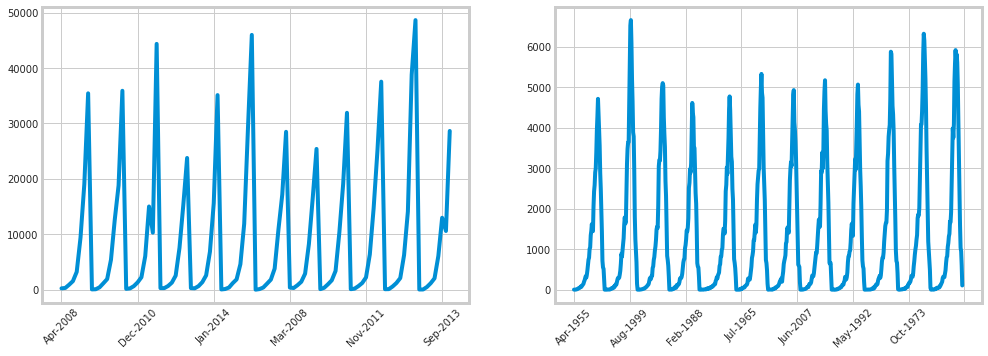

In [113]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
g = df.issue_d.value_counts().sort_index().plot()
g.set_xticklabels(g.get_xticklabels(), rotation=45);

plt.subplot(2, 2, 2)
g = df.earliest_cr_line.value_counts().sort_index().plot()
g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [114]:
df.title.isnull().sum()

152

In [117]:
df['title'] = df.title.str.lower()
df['title'].head()

0                computer
1                    bike
2    real estate business
3                personel
4                personal
Name: title, dtype: object

In [118]:
df.title.value_counts()[:30]

debt consolidation           435239
credit card refinancing      164717
home improvement              42663
other                         31978
major purchase                12346
consolidation                  7740
business                       6823
medical expenses               6782
car financing                  5591
debt consolidation loan        4683
vacation                       3993
moving and relocation          3929
credit card consolidation      3509
personal loan                  3313
consolidation loan             2597
credit card payoff             2530
credit card refinance          2437
home buying                    2383
consolidate                    2100
personal                       2021
loan                           1564
payoff                         1415
credit cards                   1369
freedom                        1279
debt                           1238
my loan                        1177
debt consolidation             1165
credit card loan            

In [119]:
df.dti.value_counts()

19.20    684
14.40    674
18.00    661
13.20    638
16.80    632
        ... 
40.56      1
45.78      1
45.58      1
46.67      1
59.19      1
Name: dti, Length: 4086, dtype: int64

In [120]:
df[df.open_acc > 40].shape

(622, 74)

In [121]:
df[df.total_acc > 80].shape

(651, 74)

In [122]:
df[df.revol_bal < 10000].shape

(373655, 74)

In [123]:
df[df.revol_util > 200]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
368206,19076217,21278928,16500.00,16500.00,16500.00,60 months,14.49,388.14,C,C4,sales rep,< 1 year,MORTGAGE,48000.00,Source Verified,Jun-2014,In Grace Period,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,debt consolidation,284xx,NC,9.33,...,0.00,NaN,1.00,INDIVIDUAL,NaN,NaN,NaN,0.00,0.00,17390.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.00,NaN,NaN,NaN
406516,14539247,16601554,3500.00,3500.00,3500.00,36 months,12.49,117.08,B,B4,budget analyst,10+ years,RENT,45000.00,Verified,Apr-2014,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,debt consolidation,918xx,CA,14.67,...,0.00,NaN,1.00,INDIVIDUAL,NaN,NaN,NaN,0.00,0.00,5668.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.00,NaN,NaN,NaN


In [8]:
df.hvplot.hist(y='open_acc', by='loan_status', bins=35, alpha=0.3)

:NdOverlay   [loan_status]
   :Histogram   [open_acc]   (open_acc_count)

In [10]:
df.hvplot.hist(y='revol_bal', by='loan_status', bins=35, alpha=0.3)

:NdOverlay   [loan_status]
   :Histogram   [revol_bal]   (revol_bal_count)

In [11]:
df.hvplot.hist(y='revol_util', by='loan_status', bins=35, alpha=0.3)

:NdOverlay   [loan_status]
   :Histogram   [revol_util]   (revol_util_count)

In [12]:
df.hvplot.hist(y='total_acc', by='loan_status', bins=35, alpha=0.3)

:NdOverlay   [loan_status]
   :Histogram   [total_acc]   (total_acc_count)

**Observation:**
* It seems that the smaller the dti the more likely that the loan will not be paid.
* Only 217 borrower have more than 40 open credit lines.
* Only 266 borrower have more than 80 credit line in the borrower credit file.